___

<H3>Ćwiczenie 2</H3>

Celem ćwiczenia jest samodzielne wykorzystanie wiedzy na temat wczytywania i przetwarzania bazy danych w języku Python.

___

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
data = load_breast_cancer()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_regression, mutual_info_regression

In [2]:
dir(data) # dir zwraca listę atrybutów danego obiektu

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

Mając do dyspozycji bazę danych dotyczącą raka piersi:
 - zwizualizuj znormalizowane dane w postaci wykresu 3D 
 - wybierz trzy cechy, które pozwalają na rozróżnienie od siebie przynajmniej dwóch klas
 - użyj funkcji plot_surface do narysowania płaszczyny pozwalającej na rozróżnienie dwóch klas (klasy nie muszą być idealnie oddzielone)

___


In [3]:
X_data, y_data = data.data, data.target #podział danych na macierz cech i wektor klas
print (X_data.shape, y_data.shape)
print (X_data[0], y_data[0])
print (data.target_names)   #nazwy klas
print (data.feature_names)  #nazwy cech
#print (data.DESCR)

(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
skala = preprocessing.MinMaxScaler()
pandy = pd.DataFrame(data = skala.fit_transform(data.data),
                            index = data.target, columns = data.feature_names)

In [5]:
pandy

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [6]:
Bestest = SelectKBest(mutual_info_regression, k=3)
Bestest.fit(pandy, data.target)
columns = Bestest.get_support(indices=True)

In [7]:
Bestpandy = pandy.iloc[:,columns]
Bestpandy

,worst radius,worst perimeter,worst area
0,0.620776,0.668310,0.450698
0,0.606901,0.539818,0.435214
0,0.556386,0.508442,0.374508
0,0.248310,0.241347,0.094008
0,0.519744,0.506948,0.341575
...,...,...,...
0,0.623266,0.576174,0.452664
0,0.560655,0.520892,0.379915
0,0.393099,0.379949,0.230731
0,0.633582,0.668310,0.402035


In [8]:
X1, X2, Y1, Y2, Z1, Z2 = Bestpandy['worst radius'][0], Bestpandy['worst radius'][1], \
                         Bestpandy['worst perimeter'][0], Bestpandy['worst perimeter'][1], \
                         Bestpandy['worst area'][0], Bestpandy['worst area'][1]                

In [9]:
dist = [[(Z1.median()+Z2.median())/2]*2]*2

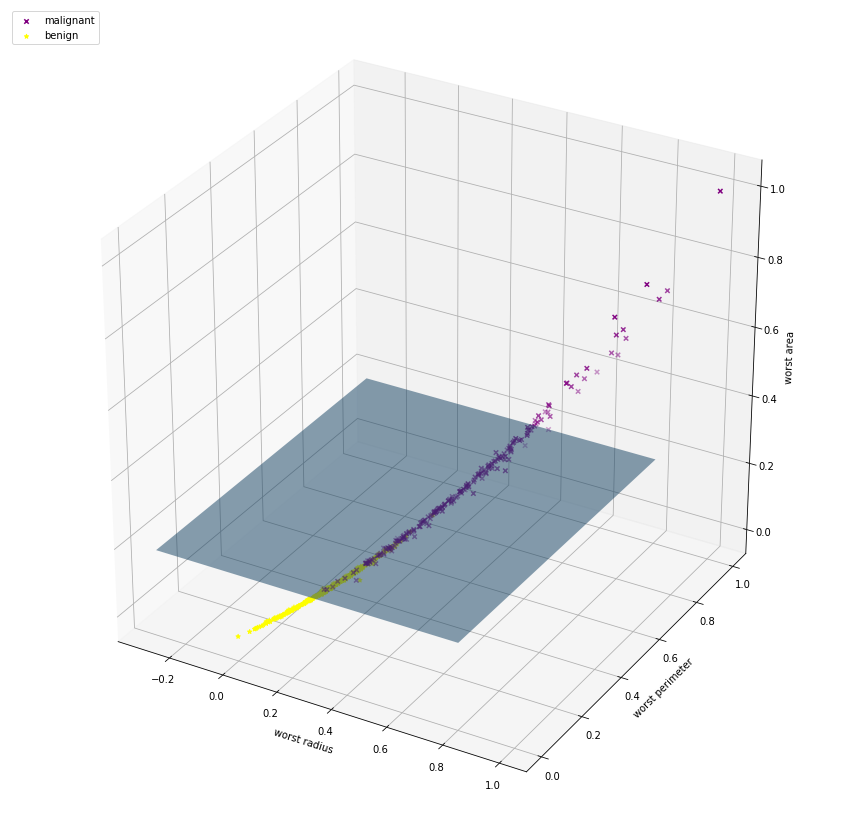

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, Y1, Z1, c='purple', marker='x', label=data.target_names[0]);
ax.scatter(X2, Y2, Z2, c='yellow', marker='*', label=data.target_names[1]);
ax.plot_surface(np.array([[-.3, -.3], [.8, .8]]),
                    np.array([[0, 1], [0, 1]]),
                    np.array(dist), alpha=.5);


ax.set_xlabel(Bestpandy.columns[0])
ax.set_ylabel(Bestpandy.columns[1])
ax.set_zlabel(Bestpandy.columns[2])

plt.legend(loc='upper left')

plt.show()

In [11]:
%matplotlib inline

<H1>Wczytwanie i przetwarzanie danych w postaci obrazów z wykorzystaniem formatu csv</H1>

___

<H3>Ćwiczenie 3</H3>

Celem ćwiczenia jest:
- wyświetlanie macierzy jako obrazu;
- zapoznanie z formatem csv;
- przećwiczenie składni Pythona podczas implementacji algorytmu wczytywania bazy danych do macierzy.

___

Pobierz i rozpakuj bazę danych GTSRB <br>
http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Downloads <br>
Wczytwanie bazy danych z pliku:

In [12]:
from imageio import imread
file_path = r"C:\Users\sticz\Desktop\Magisterka sezon drugi\Podstawy Uczenia Maszynowego\PUM-master\Laboratorium 1\GTSRB\Final_Training\Images\00000\00000_00000.ppm"
img = imread(file_path)
img.shape

(30, 29, 3)

In [13]:
img.size

2610

In [14]:
import sklearn as sk
import matplotlib.pyplot as plt

Jaki format ma jeden rekord? Jest to obraz w formacie .ppm.
Jakiego rozmiaru jest to obrazek? 2610 pixeli

Wyświetlamy wszystkie kanały osobno za pomoca matplotlib.

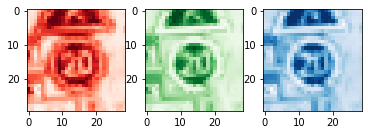

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img[:,:,0],cmap='Reds')
ax2.imshow(img[:,:,1],cmap='Greens')
ax3.imshow(img[:,:,2],cmap='Blues')
plt.show()

Wyświetlamy wszystkie kanały na raz

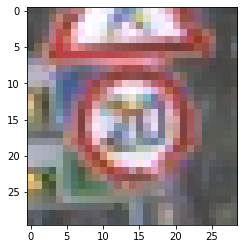

In [16]:
plt.figure()
plt.imshow(img)
plt.show()

Korzystając z pliku csv wczytaj obrazy z bazy danych. <br>
Następnie wyświetl 25 losowych obrazów na jednej kanwie, np. używając subplots.

In [17]:
import pandas
pandy = pandas.read_csv(r"C:\Users\sticz\Desktop\Magisterka sezon drugi\Podstawy Uczenia Maszynowego\PUM-master\Laboratorium 1\GTSRB\Final_Training\Images\00000\GT-00000.csv", sep = ";")

In [18]:
pandy

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,29,30,5,6,24,25,0
1,00000_00001.ppm,30,30,5,5,25,25,0
2,00000_00002.ppm,30,30,5,5,25,25,0
3,00000_00003.ppm,31,31,5,5,26,26,0
4,00000_00004.ppm,30,32,5,6,25,26,0
...,...,...,...,...,...,...,...,...
205,00006_00025.ppm,85,87,8,7,77,80,0
206,00006_00026.ppm,92,95,8,8,83,87,0
207,00006_00027.ppm,97,100,9,8,89,92,0
208,00006_00028.ppm,105,109,9,10,95,100,0


In [19]:
pandy_int = pandy[['Filename','ClassId']]
display(pandy_int)

,Filename,ClassId
0,00000_00000.ppm,0
1,00000_00001.ppm,0
2,00000_00002.ppm,0
3,00000_00003.ppm,0
4,00000_00004.ppm,0
...,...,...
205,00006_00025.ppm,0
206,00006_00026.ppm,0
207,00006_00027.ppm,0
208,00006_00028.ppm,0


In [20]:
pandy_25 = pandy_int.sample(25)
pandy_25

,Filename,ClassId
185,00006_00005.ppm,0
108,00003_00018.ppm,0
151,00005_00001.ppm,0
195,00006_00015.ppm,0
48,00001_00018.ppm,0
193,00006_00013.ppm,0
79,00002_00019.ppm,0
125,00004_00005.ppm,0
65,00002_00005.ppm,0
182,00006_00002.ppm,0


In [21]:
filename = pandy_25[['Filename']]
display(filename)

,Filename
185,00006_00005.ppm
108,00003_00018.ppm
151,00005_00001.ppm
195,00006_00015.ppm
48,00001_00018.ppm
193,00006_00013.ppm
79,00002_00019.ppm
125,00004_00005.ppm
65,00002_00005.ppm
182,00006_00002.ppm


In [22]:
filenames = filename.values.tolist()

In [23]:
filenames

[['00006_00005.ppm'],
 ['00003_00018.ppm'],
 ['00005_00001.ppm'],
 ['00006_00015.ppm'],
 ['00001_00018.ppm'],
 ['00006_00013.ppm'],
 ['00002_00019.ppm'],
 ['00004_00005.ppm'],
 ['00002_00005.ppm'],
 ['00006_00002.ppm'],
 ['00003_00028.ppm'],
 ['00004_00011.ppm'],
 ['00002_00024.ppm'],
 ['00001_00008.ppm'],
 ['00000_00000.ppm'],
 ['00005_00015.ppm'],
 ['00000_00011.ppm'],
 ['00001_00009.ppm'],
 ['00000_00026.ppm'],
 ['00000_00008.ppm'],
 ['00004_00008.ppm'],
 ['00002_00013.ppm'],
 ['00000_00005.ppm'],
 ['00005_00029.ppm'],
 ['00003_00021.ppm']]

In [24]:
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [25]:
filenames_full = r"C:\Users\sticz\Desktop\Magisterka sezon drugi\Podstawy Uczenia Maszynowego\PUM-master\Laboratorium 1\GTSRB\Final_Training\Images\00000\\" +filename

In [26]:
filenames_full

,Filename
185,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
108,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
151,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
195,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
48,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
193,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
79,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
125,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
65,C:\Users\sticz\Desktop\Magisterka sezon drugi\...
182,C:\Users\sticz\Desktop\Magisterka sezon drugi\...


In [27]:
filenamesfull_list = filenames_full.values.tolist()
filenamesfull_list

[['C:\\Users\\sticz\\Desktop\\Magisterka sezon drugi\\Podstawy Uczenia Maszynowego\\PUM-master\\Laboratorium 1\\GTSRB\\Final_Training\\Images\\00000\\\\00006_00005.ppm'],
 ['C:\\Users\\sticz\\Desktop\\Magisterka sezon drugi\\Podstawy Uczenia Maszynowego\\PUM-master\\Laboratorium 1\\GTSRB\\Final_Training\\Images\\00000\\\\00003_00018.ppm'],
 ['C:\\Users\\sticz\\Desktop\\Magisterka sezon drugi\\Podstawy Uczenia Maszynowego\\PUM-master\\Laboratorium 1\\GTSRB\\Final_Training\\Images\\00000\\\\00005_00001.ppm'],
 ['C:\\Users\\sticz\\Desktop\\Magisterka sezon drugi\\Podstawy Uczenia Maszynowego\\PUM-master\\Laboratorium 1\\GTSRB\\Final_Training\\Images\\00000\\\\00006_00015.ppm'],
 ['C:\\Users\\sticz\\Desktop\\Magisterka sezon drugi\\Podstawy Uczenia Maszynowego\\PUM-master\\Laboratorium 1\\GTSRB\\Final_Training\\Images\\00000\\\\00001_00018.ppm'],
 ['C:\\Users\\sticz\\Desktop\\Magisterka sezon drugi\\Podstawy Uczenia Maszynowego\\PUM-master\\Laboratorium 1\\GTSRB\\Final_Training\\Images\\00

In [28]:
from pathlib import Path

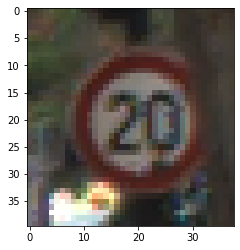

In [29]:
img = imread(Path(filenamesfull_list[0][0]))
plt.figure()
plt.imshow(img)
plt.show()

In [30]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

In [31]:
pandy_25

,Filename,ClassId
185,00006_00005.ppm,0
108,00003_00018.ppm,0
151,00005_00001.ppm,0
195,00006_00015.ppm,0
48,00001_00018.ppm,0
193,00006_00013.ppm,0
79,00002_00019.ppm,0
125,00004_00005.ppm,0
65,00002_00005.ppm,0
182,00006_00002.ppm,0


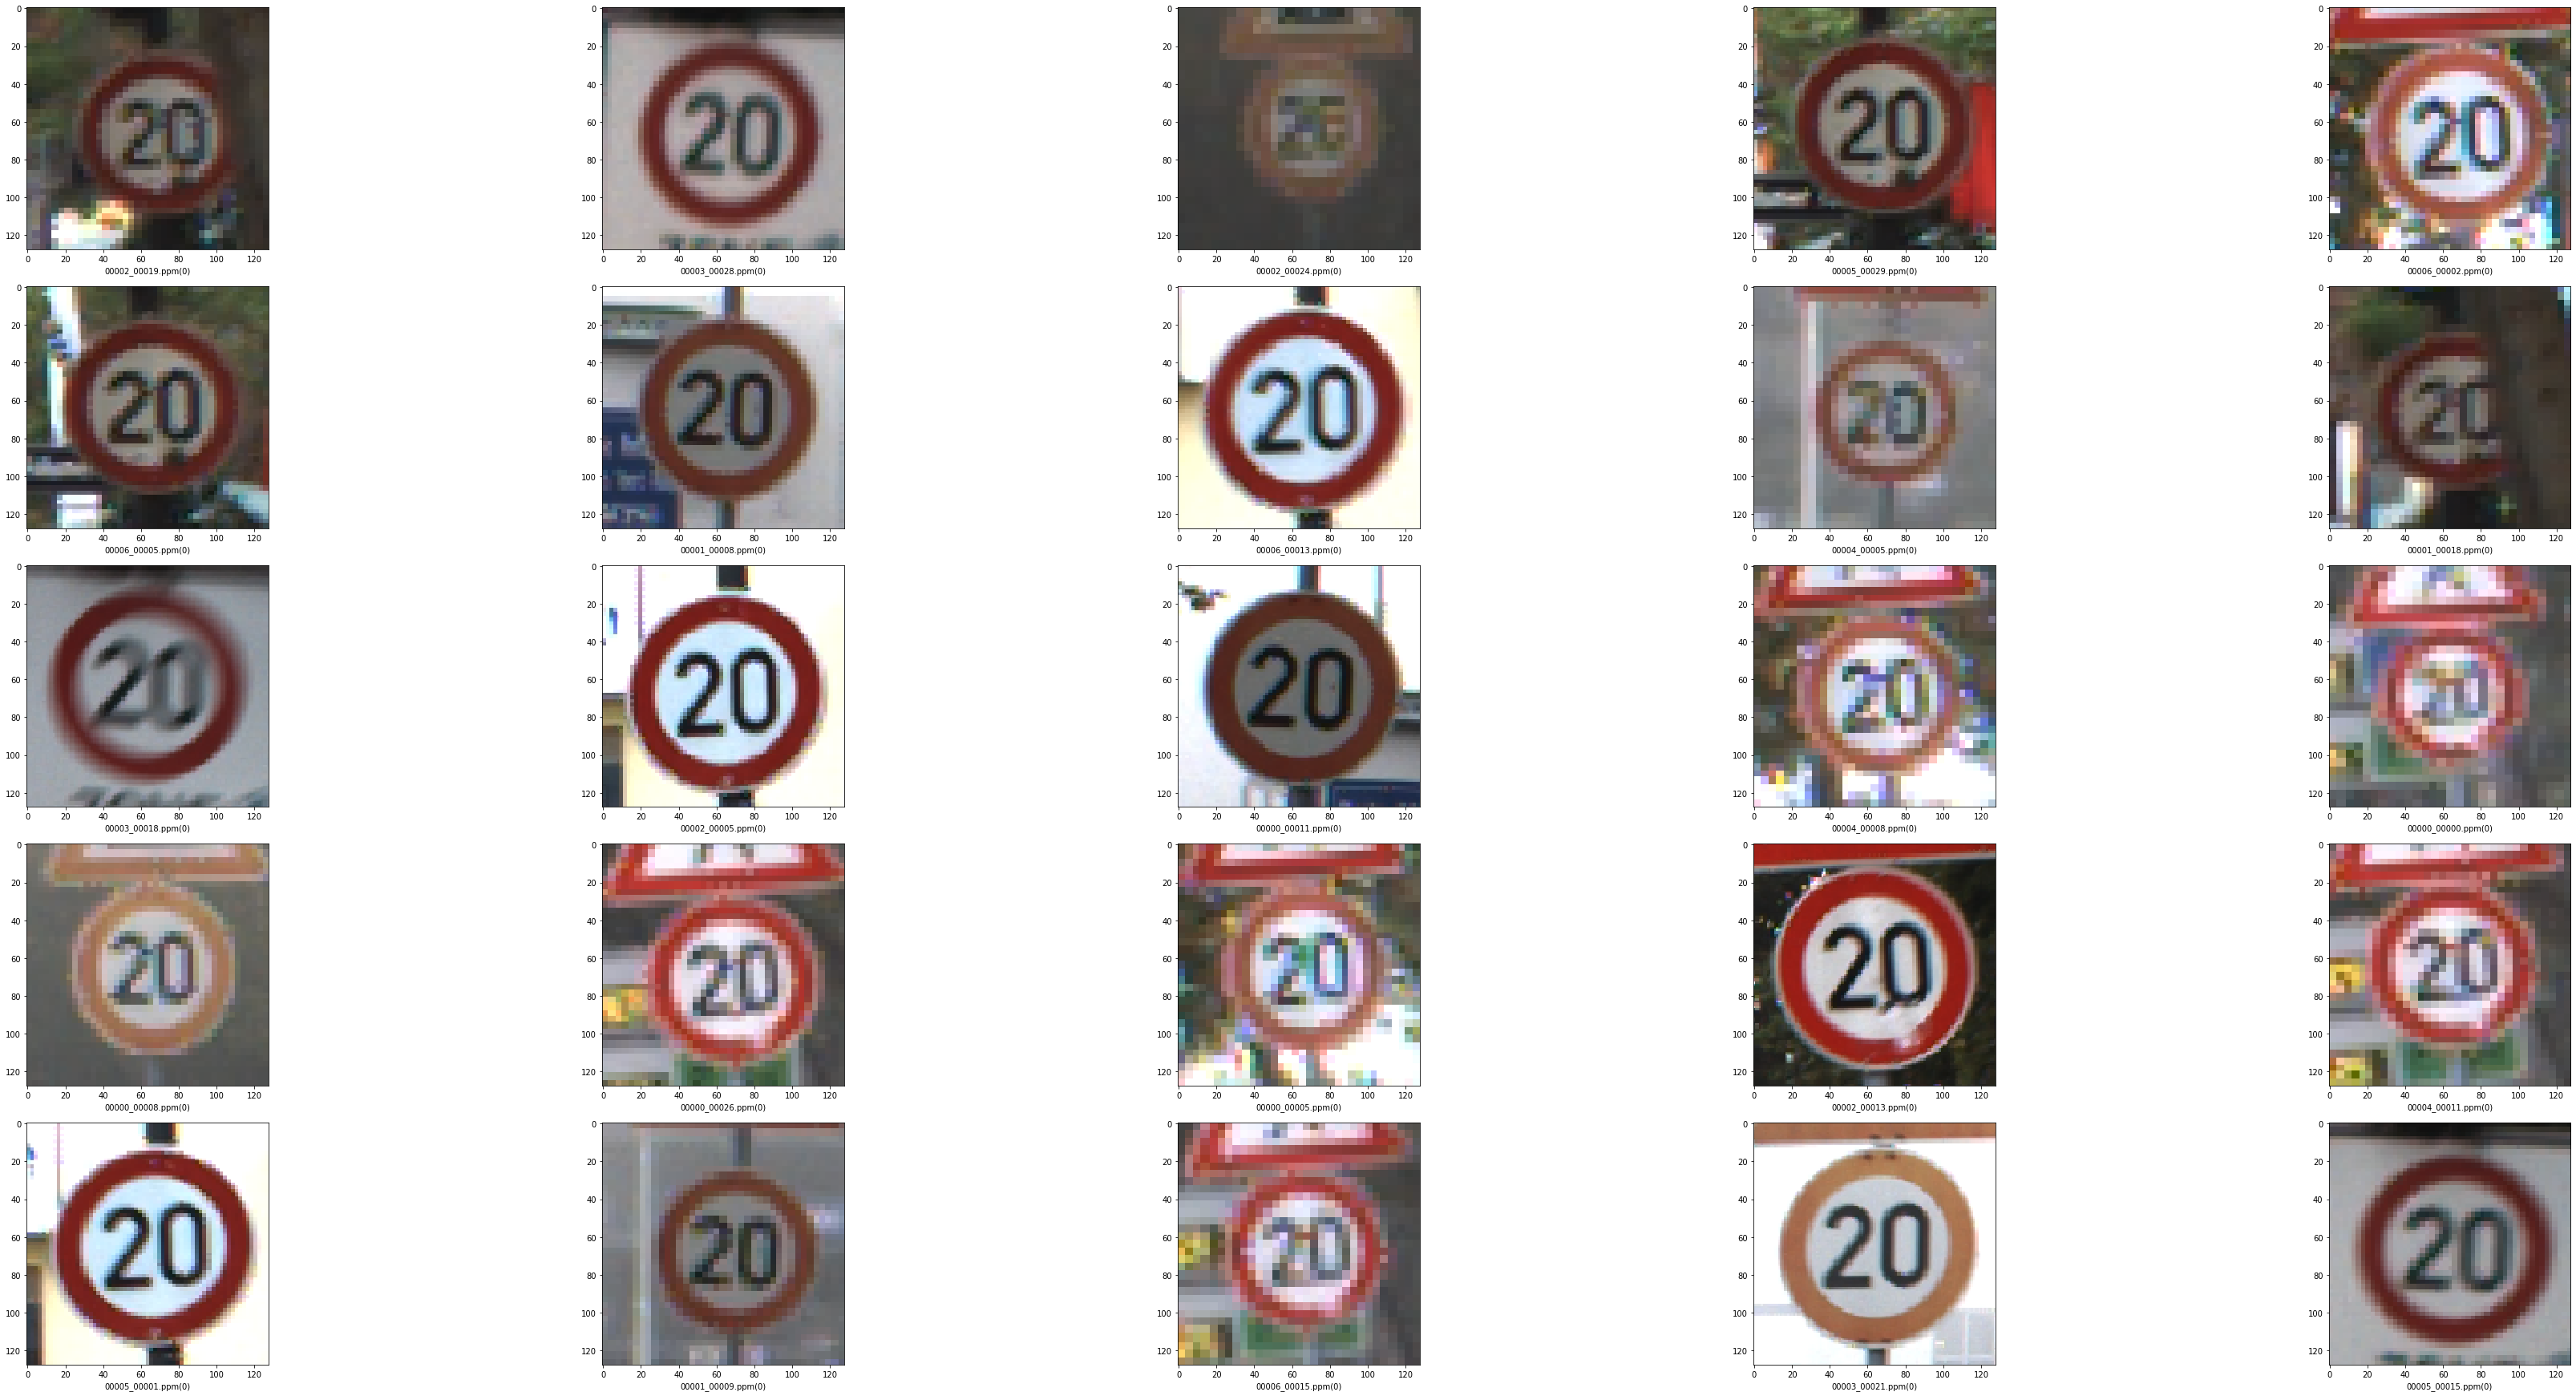

In [32]:
sample_test = pandy_25.sample(25)
sample_test.head(25)
plt.figure(figsize=(50, 48))
a = 0
lista = []
for index, row in sample_test.iterrows():
    index = a
    filename = row['Filename']
    category = row['ClassId']
    img = load_img(filenamesfull_list[a][0], target_size=IMAGE_SIZE)
    plt.subplot(10, 5, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' ) #filename + 
    a = a+1
    lista.append(category)
plt.tight_layout()
plt.show()